In [1]:
import numpy as np
import statistics
from statistics import StatisticsError
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Проверим нашу выборку на отсутствующие значения
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
# Удалим не числовые столбцы с данными
list_=list(data)
list_.remove('sales')
list_.remove('salary')

In [5]:
# Рассчитаем основные статистики для переменных
for i in list_:
    print('Анализ переменной '+i)
    print('Среднее значение', statistics.mean(data[i]))
    print('Median ', statistics.median(data[i]))
    try:
        print('Mode ', statistics.mode(data[i]))
    except StatisticsError:
        print("There is no mode!")
    print('Minimal value', min(data[i]))
    print('Maximum value', max(data[i]))
    print('Standard deviation', statistics.pstdev(data[i]))
    print('\n')

Анализ переменной satisfaction_level
Среднее значение 0.6128335222348157
Median  0.64
Mode  0.1
Minimal value 0.09
Maximum value 1.0
Standard deviation 0.2486223626820733


Анализ переменной last_evaluation
Среднее значение 0.7161017401160077
Median  0.72
Mode  0.55
Minimal value 0.36
Maximum value 1.0
Standard deviation 0.1711634045107436


Анализ переменной number_project
Среднее значение 3.80305353690246
Median  4
Mode  4
Minimal value 2
Maximum value 7
Standard deviation 1.2325512654823438


Анализ переменной average_montly_hours
Среднее значение 201.0503366891126
Median  200
There is no mode!
Minimal value 96
Maximum value 310
Standard deviation 49.94143446256218


Анализ переменной time_spend_company
Среднее значение 3.498233215547703
Median  3
Mode  3
Minimal value 2
Maximum value 10
Standard deviation 1.4600875552715114


Анализ переменной Work_accident
Среднее значение 0.1446096406427095
Median  0
Mode  0
Minimal value 0
Maximum value 1
Standard deviation 0.3517068274513532




In [6]:
# Рассчитаем корреляционную матрицу для числовых столбцов
X = data.iloc[:,:8]
X.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


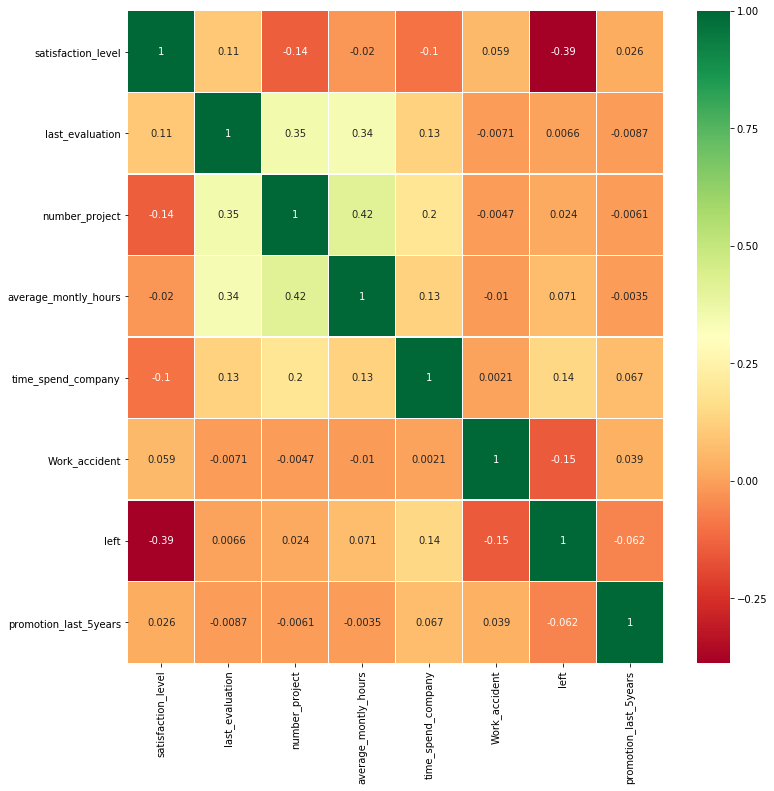

In [7]:
# Нарисуем матрицу корреляции в виде тепловой карты
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [9]:
"""Из тепловой карты видна взаимосвязь следующих переменных: satisfaction_level и left, 
average_montly_hours и number_project, last_evaluation и number_project
Проведем более детальный их анализ"""

'Из тепловой карты видна взаимосвязь следующих переменных: satisfaction_level и left, \naverage_montly_hours и number_project, last_evaluation и number_project\nПроведем более детальный их анализ'

In [10]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [11]:
# Оставим данные только по интересующим нас колонкам
df = X.drop(X.columns[[4, 5, 7]], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,left
0,0.38,0.53,2,157,1
1,0.80,0.86,5,262,1
2,0.11,0.88,7,272,1
3,0.72,0.87,5,223,1
4,0.37,0.52,2,159,1


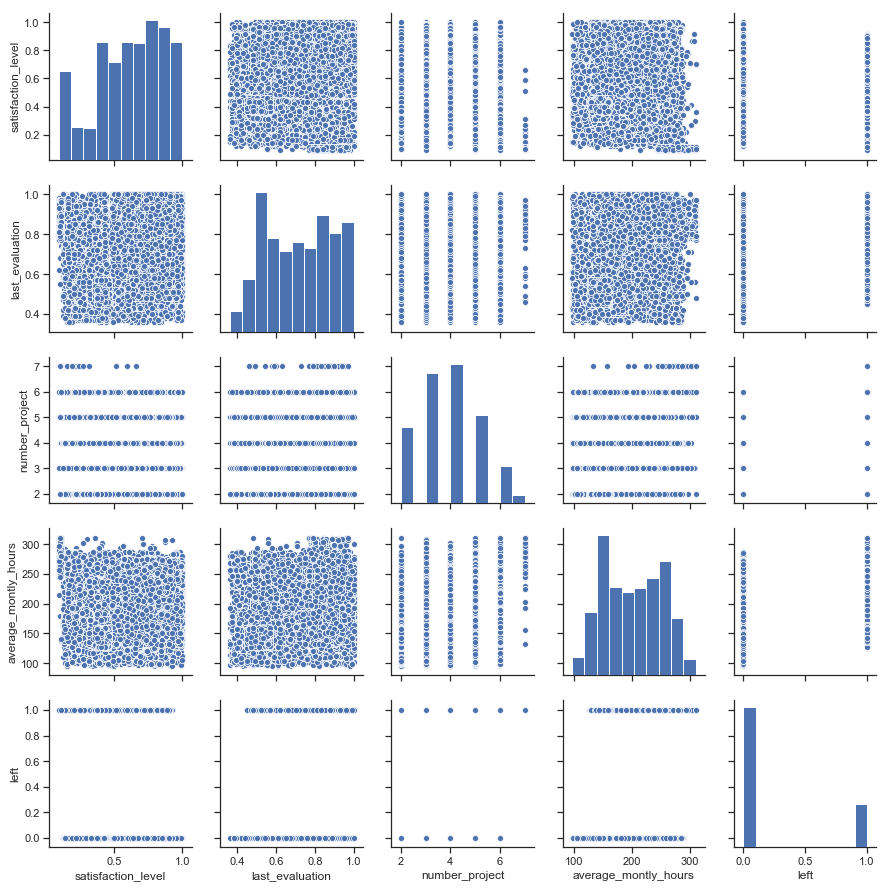

In [12]:
# Построим взаимосвязи между переменными и посмотрим как распределены их данные
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

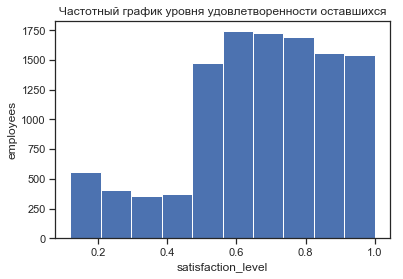

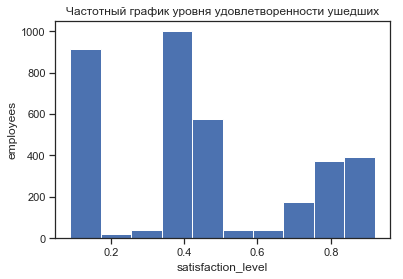

In [13]:
# Построим гистограммы по уровню удовлетворенности для ушедших и оставшихся сотрудников
plt.hist(df[df['left']==0]['satisfaction_level'])
plt.xlabel('satisfaction_level')
plt.ylabel('employees')
plt.title('Частотный график уровня удовлетворенности оставшихся')
plt.show()
plt.hist(df[df['left']==1]['satisfaction_level'])
plt.xlabel('satisfaction_level')
plt.ylabel('employees')
plt.title('Частотный график уровня удовлетворенности ушедших')
plt.show()

In [ ]:
Видим четкую взаимосвязь: ушедшие сотрудники имели более низкий уровень удовлетвоернности

In [14]:
# Проверим связь между уровнем удовлетворенности и тем ушел человек или нет
left_people = df[df['left']==0]['satisfaction_level']
stayed_people = df[df['left']==1]['satisfaction_level']
stats.ttest_ind(left_people, stayed_people)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [ ]:
Группы ушедших и оставшихся сотрудников по уровню удовлетворенности статистичеки различны, 
что показывает значение р равное 0.

In [15]:
less_projects = df[df['number_project']==2]['last_evaluation']
many_projects = df[df['number_project']==5]['last_evaluation']
stats.ttest_ind(less_projects, many_projects)

Ttest_indResult(statistic=-45.74103337742476, pvalue=0.0)

In [ ]:
Группы сотрудников с малым и большим числом проектов статистичеки различны, что показывает значение р равное 0.

In [16]:
left_people = df[df['left']==0]['average_montly_hours']
stayed_people = df[df['left']==1]['average_montly_hours']
stats.ttest_ind(left_people, stayed_people)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

In [ ]:
Группы ушедших и оставшихся сотрудников по количеству отработанных часов статистичеки различны, 
что показывает значение р стремящееся к 0.

In [17]:
# Рассчитаем количество работников в каждом департаменте
data_st=data[data['left']==0]
grouped=data_st.groupby('sales')
grouped['left'].count()

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

In [24]:
grouped=data_st.groupby('salary').count()
grouped.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
salary,,,,,,,,,
high,1155,1155,1155,1155,1155,1155,1155,1155,1155
low,5144,5144,5144,5144,5144,5144,5144,5144,5144
medium,5129,5129,5129,5129,5129,5129,5129,5129,5129


([<matplotlib.axis.XTick at 0x102b4e80>,
 <a list of 3 Text xticklabel objects>)

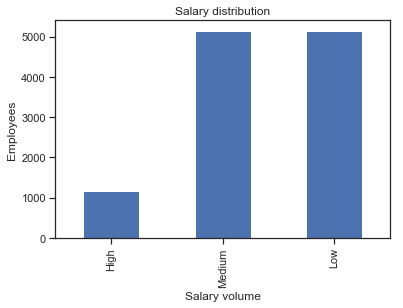

In [40]:
grouped=grouped.iloc[:,:1]
grouped.unstack('salary').plot(kind='bar')
plt.title('Salary distribution')
plt.xlabel('Salary volume')
plt.ylabel('Employees')
plt.xticks(np.arange(3),('High','Medium','Low'))

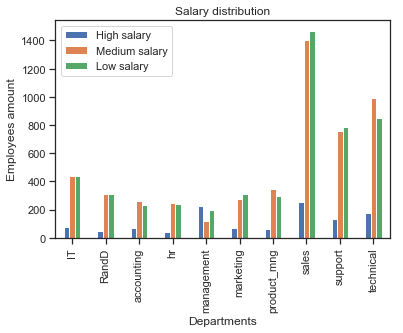

In [44]:
grouped=data_st.groupby(['sales','salary']).count()
grouped=grouped.iloc[:,:1]
grouped.unstack().plot(kind='bar')
plt.xlabel('Departments')
plt.ylabel('Employees amount')
plt.title('Salary distribution')
plt.legend(('High salary', 'Medium salary', 'Low salary'))

In [45]:
print('Компанию покинули', data[data['left']==1]['left'].sum(),'сотрудников')

Компанию покинули 3571 сотрудников


In [46]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
#Построим линейную регрессию между уровнем удовлетворенности и уходом
from sklearn.linear_model import LinearRegression
SL = data['satisfaction_level']
left = data['left']
model = LinearRegression()
result = model.fit(np.array(SL).reshape(-1,1), left)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.6458112624337791
slope: [-0.66531727]


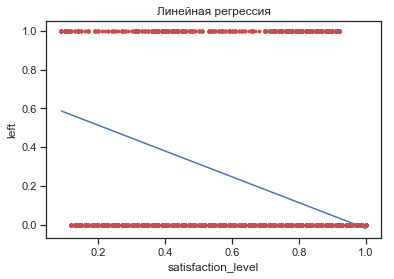

In [48]:
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.title('Линейная регрессия')
x = np.linspace(min(SL), max(SL), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(SL, left,  'r.')
plt.show()

In [49]:
model.predict(np.array([0.8]).reshape(-1,1))

array([0.11355745])

In [50]:
В данном случае видим, что модель очень не точно предсказывает уходит сотрудник или остается. 
Построим многомерную регрессию для оценки вероятности ухода.
Возьмем следующие переменные: Work_accident, satisfaction_level

SyntaxError: invalid syntax (<ipython-input-50-fa3a3d3f109f>, line 1)

In [51]:
WA = data['Work_accident']
x = np.vstack([np.array(WA), np.array(SL)]).T
print('x - это двумерная матрица, где колонки - это Work_accident и satisfaction_level: ')
print(x[:3])
y = np.array(left)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

x - это двумерная матрица, где колонки - это Work_accident и satisfaction_level: 
[[0.   0.38]
 [0.   0.8 ]
 [0.   0.11]]
intercept: 0.660824754068835
slope: [-0.16018945 -0.65201602]


In [52]:
print('Предсказание модели: ', model.predict(x[2:3]))

Предсказание модели:  [0.58910299]


In [ ]:
Видим, что если у сотрудника был несчастный случай на работе, то это влияет на то, что он останется в компании.
Проверим еще last_evaluation,  	promotion_last_5years

In [53]:
LA = data['last_evaluation']
PL5= data['promotion_last_5years']
x = np.vstack([np.array(LA), np.array(PL5)]).T
print(x[:3])
y = np.array(left)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

[[0.53 0.  ]
 [0.86 0.  ]
 [0.88 0.  ]]
intercept: 0.23121193126436812
slope: [ 0.01500713 -0.18224612]


In [ ]:
Видим, что есть зависимость от того, было ли повышение в последние 5 лет или нет. Витоге, у нас есть несколько переменных, 
которые можно обьеденить в одну модель: Work_accident, satisfaction_level, promotion_last_5years
Попробуем сделать многомерную регрессию

In [54]:
x = np.vstack([np.array(WA), np.array(PL5), np.array(SL)]).T
print(x[200:205])
y = np.array(left)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

[[0.   0.   0.9 ]
 [0.   0.   0.39]
 [0.   0.   0.76]
 [0.   0.   0.1 ]
 [0.   0.   0.87]]
intercept: 0.6623085541090539
slope: [-0.15803621 -0.13859508 -0.65013546]


In [ ]:
Можно  сделать вывод о том, что основное влиние оказывает уровень удовлетворенности, также, 
повышение за последние 5 лет сказывается на лояльности сотрудника, и, что удивило, наличие несчастного случая
привязывает сотруднкиа к компании.